In [3]:
#matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#from IPython.core.display import HTML
#css = open('style-table.css').read()+ open('style-notebook.css').read()
#HTML('<style>()</style>'.format(css))

In [4]:
titles=pd.read_csv('titles.csv')
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [5]:
cast=pd.read_csv('cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [22]:
super_bat = cast[(cast.character=='Superman') | (cast.character == 'Batman')].groupby(['year','character']).size().unstack().fillna(0)

c = super_bat.Superman - super_bat.Batman

print(str(len(c[c>0])))

11


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [23]:
super_bat = cast[(cast.character=='Superman') | (cast.character == 'Batman')].groupby(['year','character']).size().unstack().fillna(0)

c = super_bat.Batman - super_bat.Superman 

print(str(len(c[c>0])))

27


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

<Axes: xlabel='year'>

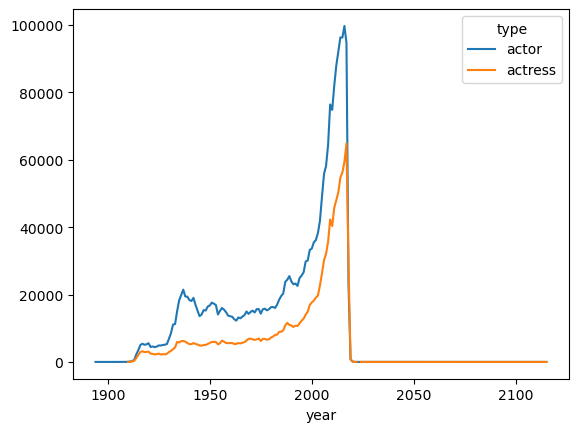

In [51]:
#a = cast.loc[cast['type']=='actress']
cast.groupby(['year','type']).size().unstack().plot()

<Axes: xlabel='year'>

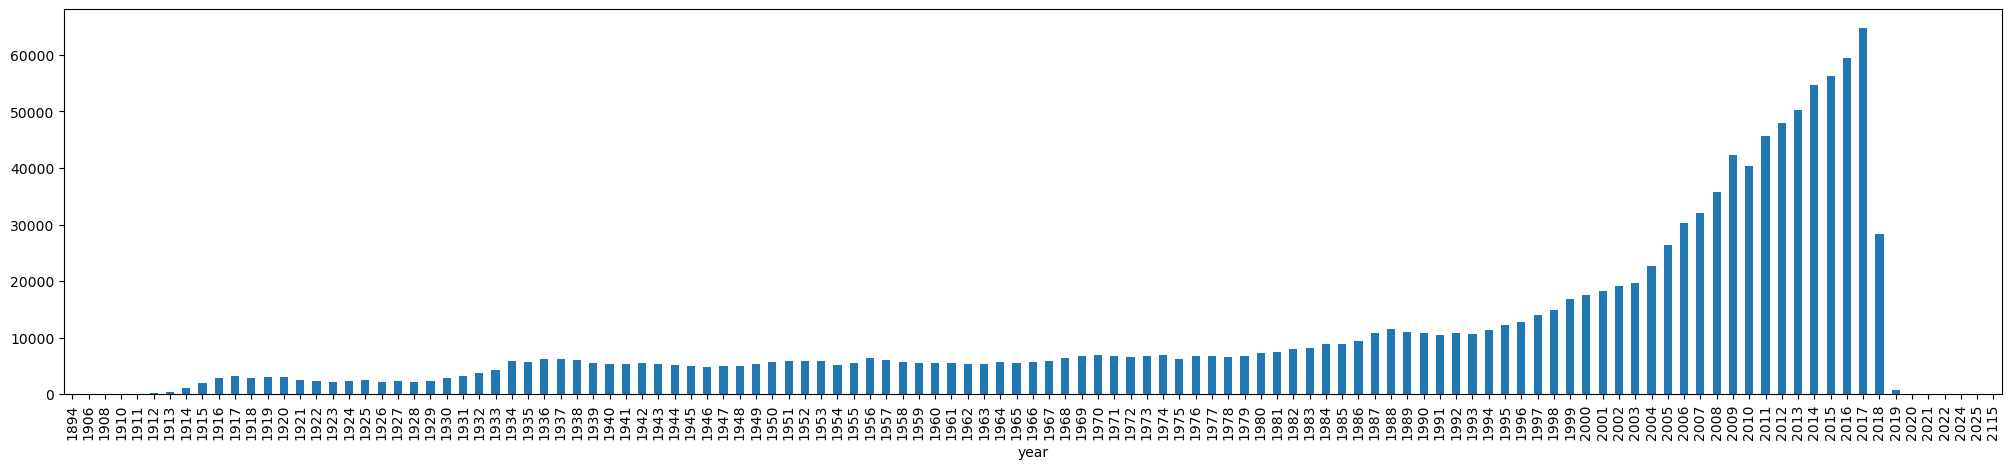

In [67]:
a = cast.loc[cast['type']=='actress']
x = a.groupby(cast['year']).size()
x.plot(kind='bar', figsize=(25,5))

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

<Axes: xlabel='year'>

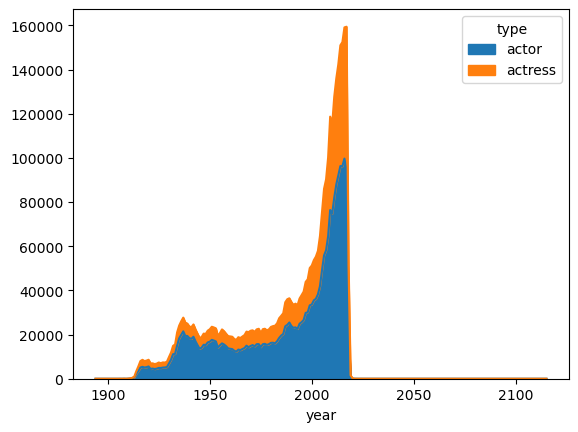

In [54]:
x = cast.groupby(['year','type']).size().unstack()
x.plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

<Axes: xlabel='year'>

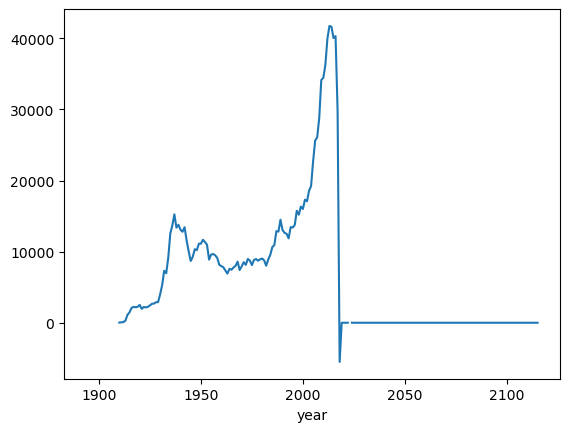

In [55]:
a = cast.groupby(['year','type']).size().unstack()
(a['actor']-a['actress']).plot()

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

<Axes: xlabel='year'>

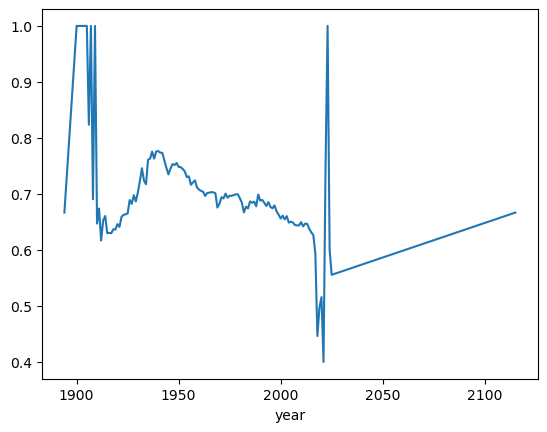

In [80]:
a = cast.groupby(['year','type']).size().unstack().fillna(0)
a['tot_role'] = a['actor'] + a['actress']
a['actor_fract'] = (a['actor'])/(a['tot_role'])
a['actor_fract'].plot()

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

<Axes: xlabel='year'>

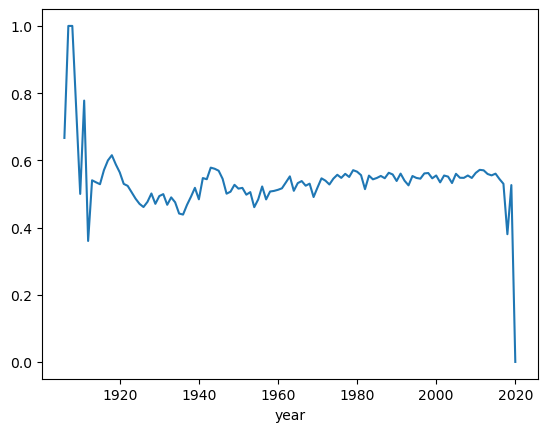

In [81]:
a = cast[cast.n==2]
role_supp = a.groupby(['year','type']).size().unstack().fillna(0)
role_supp['tot_role'] = role_supp['actor'] + role_supp['actress']
role_supp['actor_fract'] = (role_supp['actor'])/(role_supp['tot_role'])
role_supp['actor_fract'].plot()

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

<Axes: xlabel='year'>

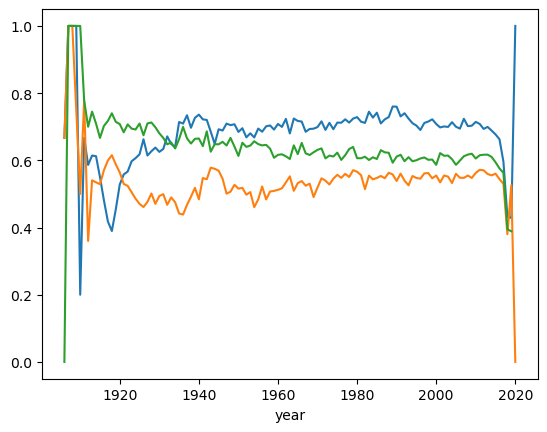

In [89]:
n1 = cast[cast.n==1]
a1 = n1.groupby(['year','type']).size().unstack().fillna(0)
a1['tot_rol1'] = a1['actor'] + a1['actress']
a1['frac'] = (a1['actor'])/(a1['tot_rol1'])

n2 = cast[cast.n==2]
a2 = n2.groupby(['year','type']).size().unstack().fillna(0)
a2['tot_rol2'] = a2['actor'] + a2['actress']
a2['frac2'] = (a2['actor'])/(a2['tot_rol2'])

n3 = cast[cast.n==3]
a3 = n3.groupby(['year','type']).size().unstack().fillna(0)
a3['tot_rol3'] = a3['actor'] + a3['actress']
a3['frac3'] = (a3['actor'])/(a3['tot_rol3'])

a1['frac'].plot() 
a2['frac2'].plot() 
a3['frac3'].plot()

